# 라이브러리 불러오기

In [ ]:
import numpy as np
print("numpy: ver.", np.__version__)
import pandas as pd
print("pandas: ver.", pd.__version__)

numpy: ver. 1.21.5
pandas: ver. 1.3.5


# 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/Data/supermarket_sales.csv'
sales = pd.read_csv(DATA_PATH)
print(sales.head(3))

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity      Date   Time      Payment  
0       Health and beauty       74.69         7  1/5/2019  13:08      Ewallet  
1  Electronic accessories       15.28         5  3/8/2019  10:29         Cash  
2      Home and lifestyle       46.33         7  3/3/2019  13:23  Credit card  


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Date           1000 non-null   object 
 9   Time           1000 non-null   object 
 10  Payment        1000 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 86.1+ KB


# 데이터 그룹화
- groupby() 및 다양한 집계함수 활용

In [ ]:
sales.groupby(by="Product line")['Quantity'].count()

Product line
Electronic accessories    170
Fashion accessories       178
Food and beverages        174
Health and beauty         152
Home and lifestyle        160
Sports and travel         166
Name: Quantity, dtype: int64

In [ ]:
sales.groupby(by="Product line")['Quantity'].sum()

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

In [ ]:
print(sales.groupby(by=["Branch","Customer type"])['Quantity'].sum())
print(type(sales.groupby(by=["Branch","Customer type"])['Quantity'].sum())) # Series 객체

Branch  Customer type
A       Member           964
        Normal           895
B       Member           924
        Normal           896
C       Member           897
        Normal           934
Name: Quantity, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
print(sales.groupby(by=["Branch","Payment"], as_index=False)['Quantity'].sum())
print(type(sales.groupby(by=["Branch","Payment"], as_index=False)['Quantity'].sum())) # DataFrmae 객체

  Branch      Payment  Quantity
0      A         Cash       572
1      A  Credit card       580
2      A      Ewallet       707
3      B         Cash       628
4      B  Credit card       599
5      B      Ewallet       593
6      C         Cash       696
7      C  Credit card       543
8      C      Ewallet       592
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(sales.groupby(by=["Branch", "Payment"])['Unit price'].agg(["max", "min", "mean"]))
print(type(sales.groupby(by=["Branch", "Payment"])['Unit price'].agg(["max", "min", "mean"]))) # DataFrame 객체

                      max    min       mean
Branch Payment                             
A      Cash         99.78  10.08  56.374636
       Credit card  99.56  11.94  53.011635
       Ewallet      99.83  10.13  54.849762
B      Cash         99.69  11.85  56.758818
       Credit card  99.96  10.59  56.838991
       Ewallet      99.92  10.75  53.450973
C      Cash         99.96  10.17  57.100081
       Credit card  99.82  10.18  53.143061
       Ewallet      99.79  10.16  59.238962
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(sales.groupby(by=["Branch", "Payment"])['Unit price'].agg(["max", "min", "mean"]).reset_index())
print(type(sales.groupby(by=["Branch", "Payment"])['Unit price'].agg(["max", "min", "mean"]).reset_index()))

  Branch      Payment    max    min       mean
0      A         Cash  99.78  10.08  56.374636
1      A  Credit card  99.56  11.94  53.011635
2      A      Ewallet  99.83  10.13  54.849762
3      B         Cash  99.69  11.85  56.758818
4      B  Credit card  99.96  10.59  56.838991
5      B      Ewallet  99.92  10.75  53.450973
6      C         Cash  99.96  10.17  57.100081
7      C  Credit card  99.82  10.18  53.143061
8      C      Ewallet  99.79  10.16  59.238962
<class 'pandas.core.frame.DataFrame'>


# 결측치 처리

## 결측치 데이터 생성

In [ ]:
dict_01 = {
    'Score A' : [80, 90, np.nan, 80],
    'Score B' : [30, 45, np.nan, np.nan],
    'Score C' : [np.nan, 50, 80, 90]
}
df = pd.DataFrame(dict_01)
print(df)

   Score A  Score B  Score C
0     80.0     30.0      NaN
1     90.0     45.0     50.0
2      NaN      NaN     80.0
3     80.0      NaN     90.0


In [ ]:
print(df.isnull())
print("\n")
print(df.isnull().sum())

   Score A  Score B  Score C
0    False    False     True
1    False    False    False
2     True     True    False
3    False     True    False


Score A    1
Score B    2
Score C    1
dtype: int64


In [ ]:
dict_02 = {
    "Gender" : ["Male", "Female", np.nan, "Male"],
    "Salary" : [30, 45, 90, 70]
}

df2 = pd.DataFrame(dict_02)
print(df2)

   Gender  Salary
0    Male      30
1  Female      45
2     NaN      90
3    Male      70


In [ ]:
print(df.isnull())
print("\n")
print(df.isnull().sum())

   Score A  Score B  Score C
0    False    False     True
1    False    False    False
2     True     True    False
3    False     True    False


Score A    1
Score B    2
Score C    1
dtype: int64


## 결측치 값 대체
- 문자열 타입과 숫자 타입의 접근 방법 상이
  + 문자열 : 최빈값 등
  + 숫자 : 평균, 최대값, 최소값, 중간값 등

In [ ]:
print(df.fillna(0)) # 0으로 대체

   Score A  Score B  Score C
0     80.0     30.0      0.0
1     90.0     45.0     50.0
2      0.0      0.0     80.0
3     80.0      0.0     90.0
Score A    float64
Score B    float64
Score C    float64
dtype: object


In [ ]:
print(df.fillna(method="pad")) # 앞 데이터로 대체
# print(df.fillna(method="ffill")) : 동일한 결과

   Score A  Score B  Score C
0     80.0     30.0      NaN
1     90.0     45.0     50.0
2     90.0     45.0     80.0
3     80.0     45.0     90.0
   Score A  Score B  Score C
0     80.0     30.0      NaN
1     90.0     45.0     50.0
2     90.0     45.0     80.0
3     80.0     45.0     90.0


In [ ]:
print(df.fillna(method="backfill")) # 뒤 데이터로 대체
# print(df.fillna(method="bfill")) : 동일한 결과

   Score A  Score B  Score C
0     80.0     30.0     50.0
1     90.0     45.0     50.0
2     80.0      NaN     80.0
3     80.0      NaN     90.0


In [ ]:
print(df2['Gender'].fillna("Genderless")) # 특정 문자열로 대체

0          Male
1        Female
2    Genderless
3          Male
Name: Gender, dtype: object


## 결측치가 있는 행, 열 제거

In [ ]:
dict_03 = {
    'Score A' : [80, 90, np.nan, 80],
    'Score B' : [30, 45, np.nan, np.nan],
    'Score C' : [np.nan, 50, 80, 90],
    'Score D' : [50, 30, 80, 60]
}
df3 = pd.DataFrame(dict_03)
print(df3)

   Score A  Score B  Score C  Score D
0     80.0     30.0      NaN       50
1     90.0     45.0     50.0       30
2      NaN      NaN     80.0       80
3     80.0      NaN     90.0       60


In [ ]:
print(df3.dropna()) # axis: default 0
print("\n")
print(df3.dropna(axis=1))

   Score A  Score B  Score C  Score D
1     90.0     45.0     50.0       30


   Score D
0       50
1       30
2       80
3       60


# 이상치 탐지
- 일반적으로 IQR(= Q3 - Q1; 사분위수범위)를 활용하여 탐지
  + 하한 경계값 : Q1 - IQR * 1.5
  + 상한 경계값 : Q3 + IQR * 1.5
- Box Plot으로도 확인 가능
- 실무에서는 각 도메인(비즈니스 영역)별로 기준 상이

In [ ]:
print(sales[['Unit price']].describe())

        Unit price
count  1000.000000
mean     55.672130
std      26.494628
min      10.080000
25%      32.875000
50%      55.230000
75%      77.935000
max      99.960000


In [ ]:
q1 = sales['Unit price'].quantile(0.25)
q3 = sales['Unit price'].quantile(0.75)
iqr = q3 - q1
lim_q1 = q1 - 1.5 * IQR
lim_q3 = q3 + 1.5 * IQR
print(tuple([lim_q1, lim_q3]))
print("\n")
out_q1 = (sales['Unit price'] < lim_q1)
out_q3 = (sales['Unit price'] > lim_q3)
outliers = (sales['Unit price'][out_q1 | out_q3])
print(outliers)

(-34.715, 145.525)


Series([], Name: Unit price, dtype: float64)


{'boxes': [<matplotlib.lines.Line2D at 0x7fefce5f93d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fefce5fe3d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fefce605410>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fefce5fee90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fefce5f9910>,
  <matplotlib.lines.Line2D at 0x7fefce5f9e50>]}

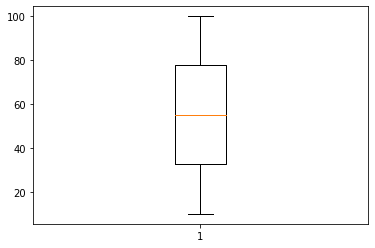

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(sales['Unit price'])